# Testing minor-embedding of dense graphs to IBM hardware graphs

Requirements:
```
minorminer
qiskit[visualization]
qiskit-ibm-runtime
```

In [1]:
from qiskit.visualization import plot_circuit_layout
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(instance="ibm-q/open/main")
service.backends()
 

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

## Preparation of a hardware graph

Here we choose a backend from the above list.

In [2]:
backend = service.backend("ibm_brisbane")

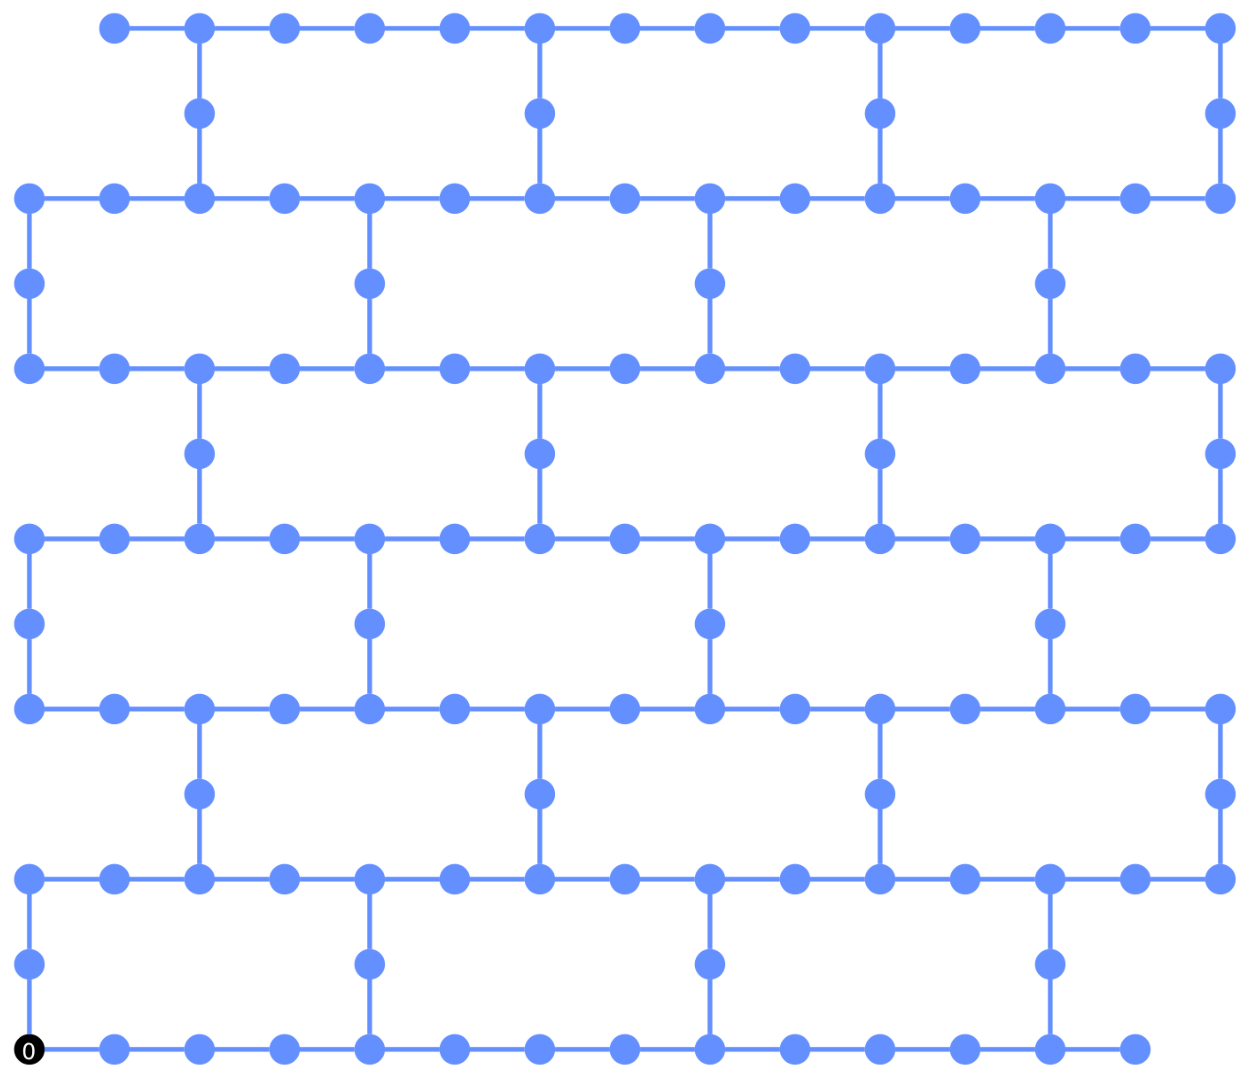

In [3]:
from qiskit import QuantumCircuit, transpile
qc = QuantumCircuit(1,1)
plot_circuit_layout(transpile(qc, backend), backend)

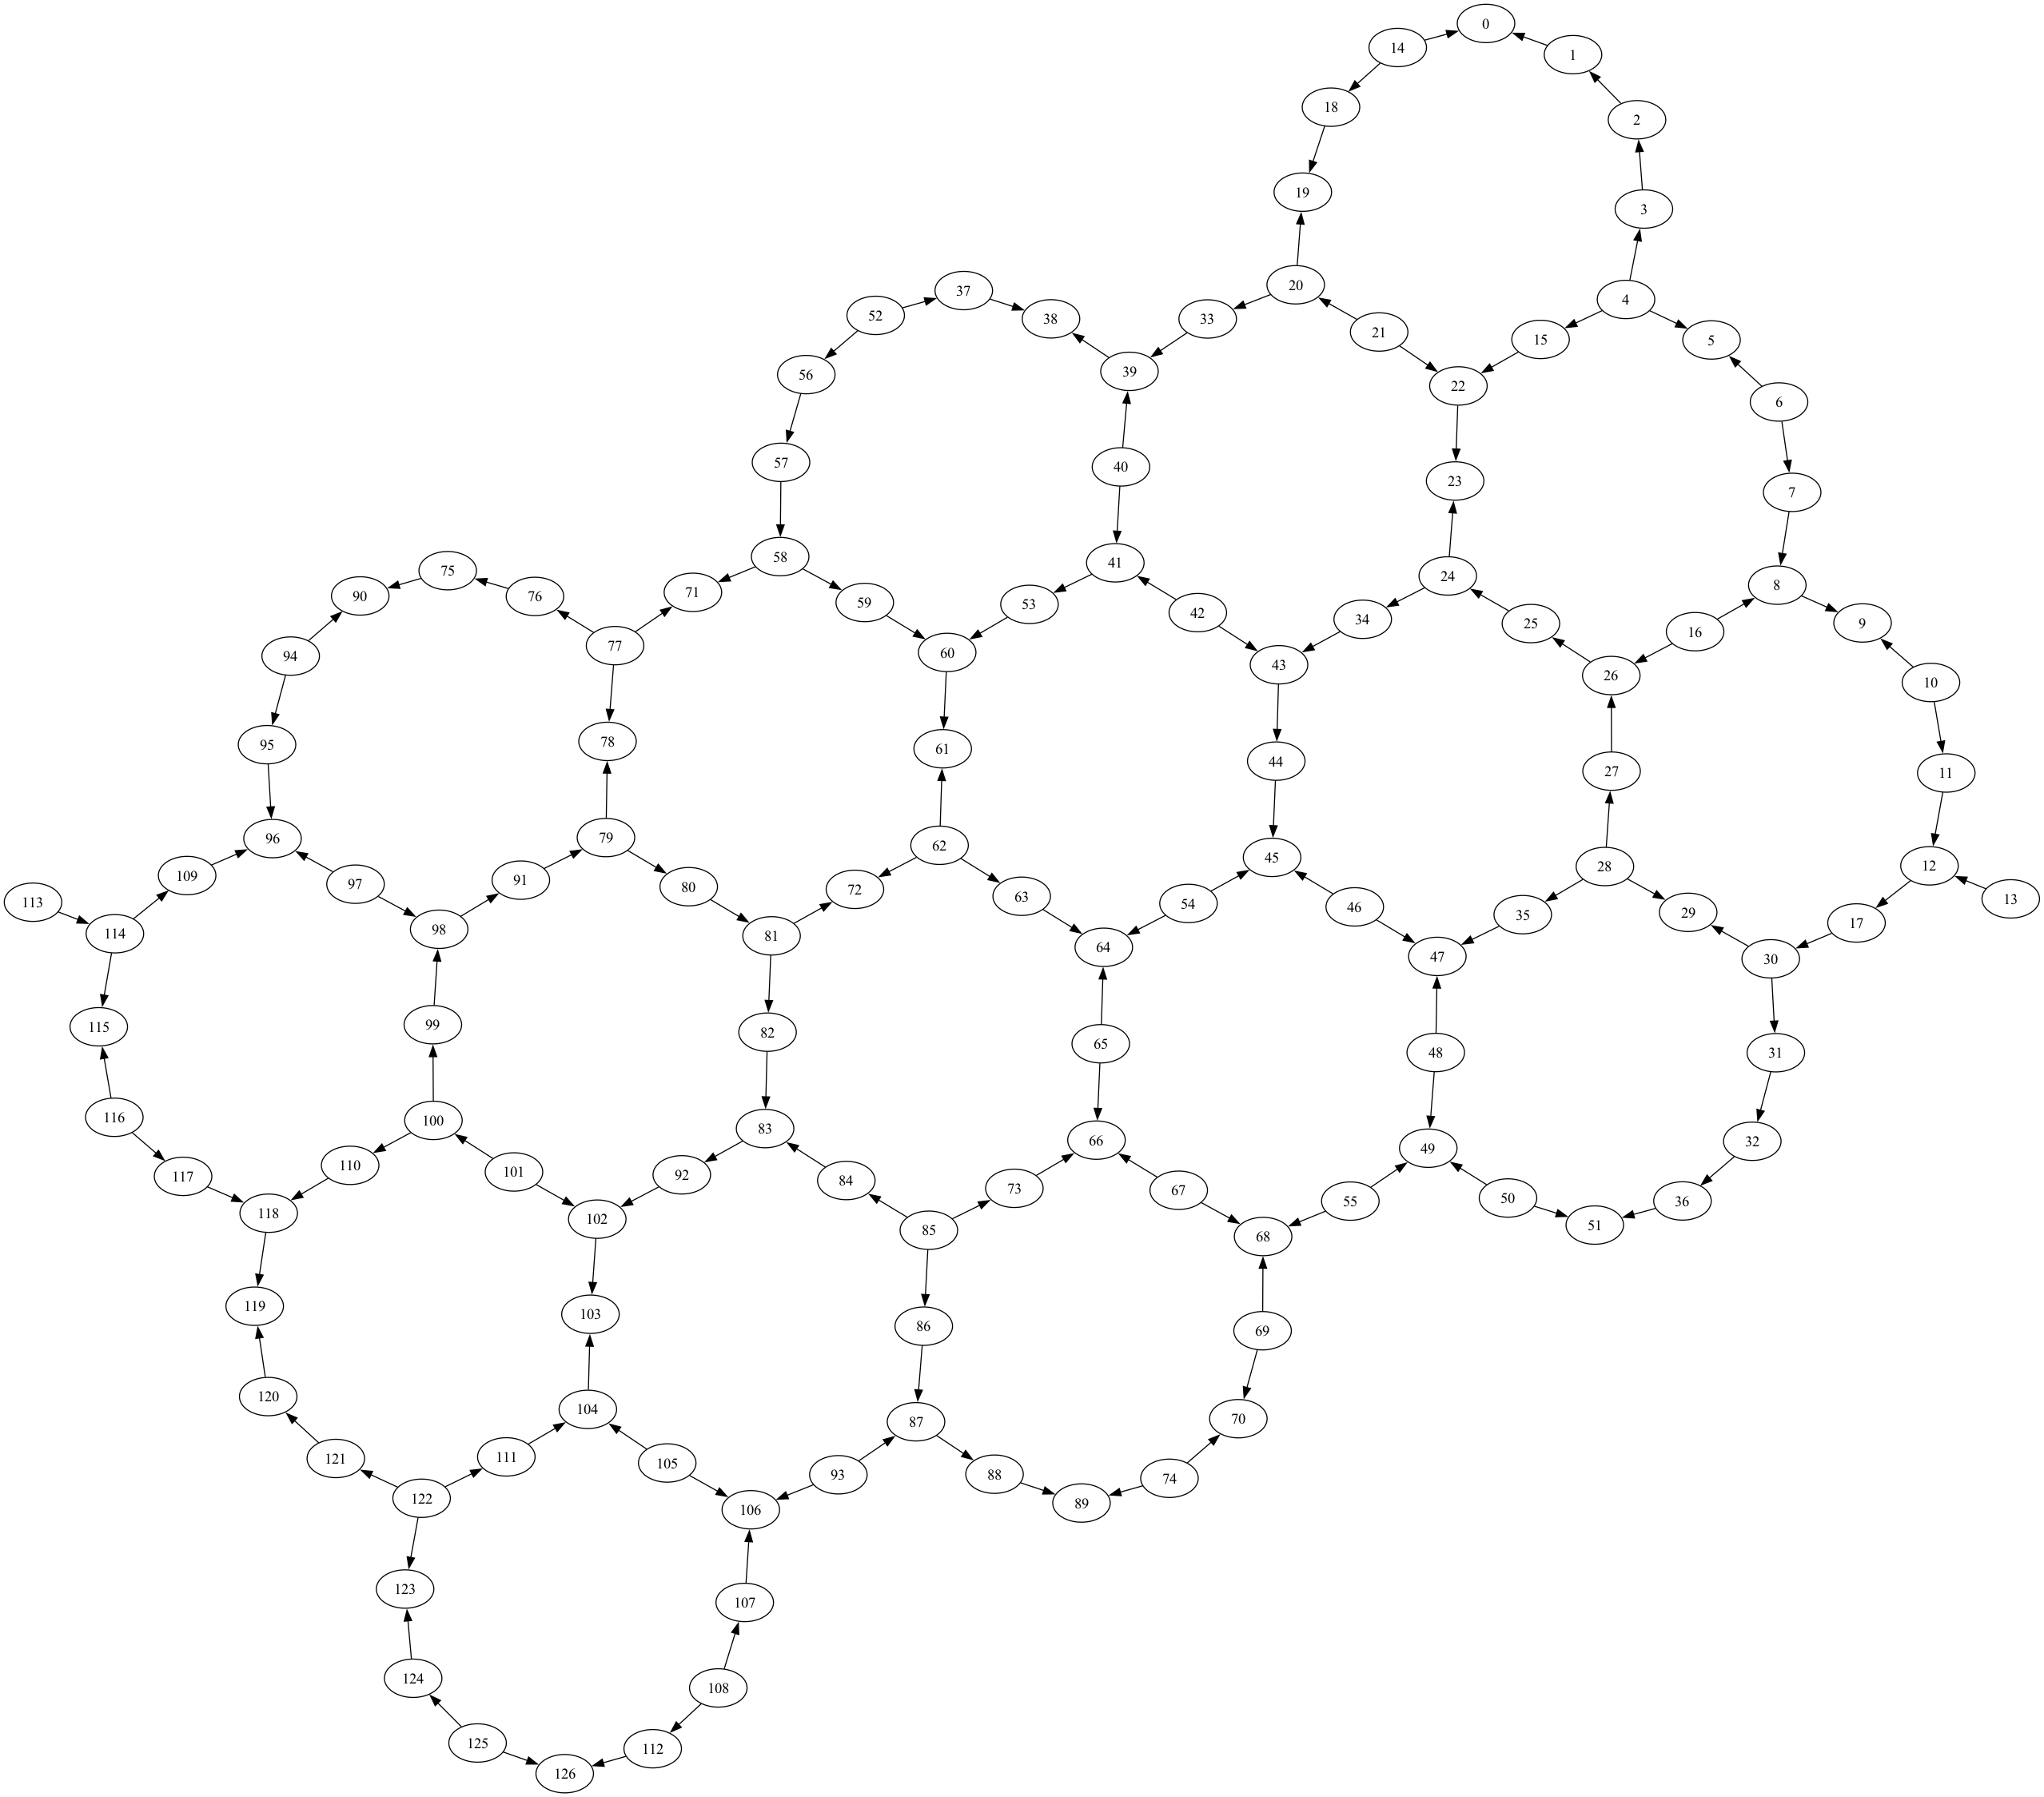

In [4]:
backend.coupling_map.draw()

## Preparation of a graph to embed

We take a complete graph as a source graph to embed.

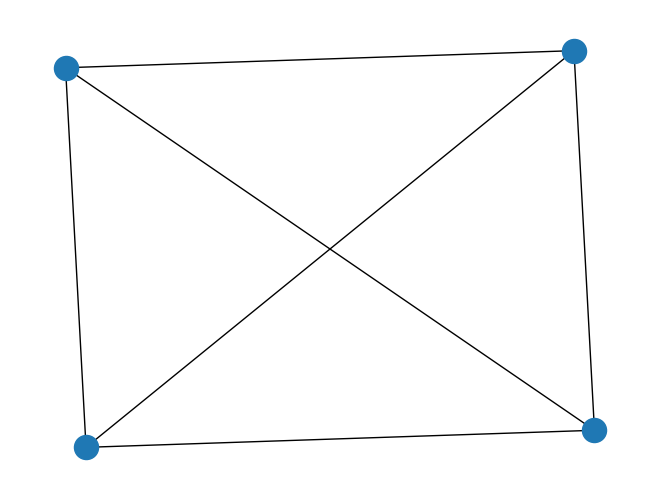

In [5]:
import networkx as nx

num_nodes = 4
source = nx.complete_graph(num_nodes)
nx.draw(source)

## Find minor-embedding

The obtained embedding is represented as a dictionary mapping a source node to a list of target nodes (a chain).

In [6]:
from minorminer import find_embedding
embedding = find_embedding(source, backend.coupling_map.graph.edge_list())
embedding

{0: [82, 81, 72, 62, 61],
 1: [60, 53, 41, 42, 43, 44, 45, 46, 47, 48, 49, 55],
 2: [54, 64, 65, 63],
 3: [66, 67, 68, 73, 85, 84, 83]}

## Visualization

A color corresponds to a chain representing one logical node of the source graph.

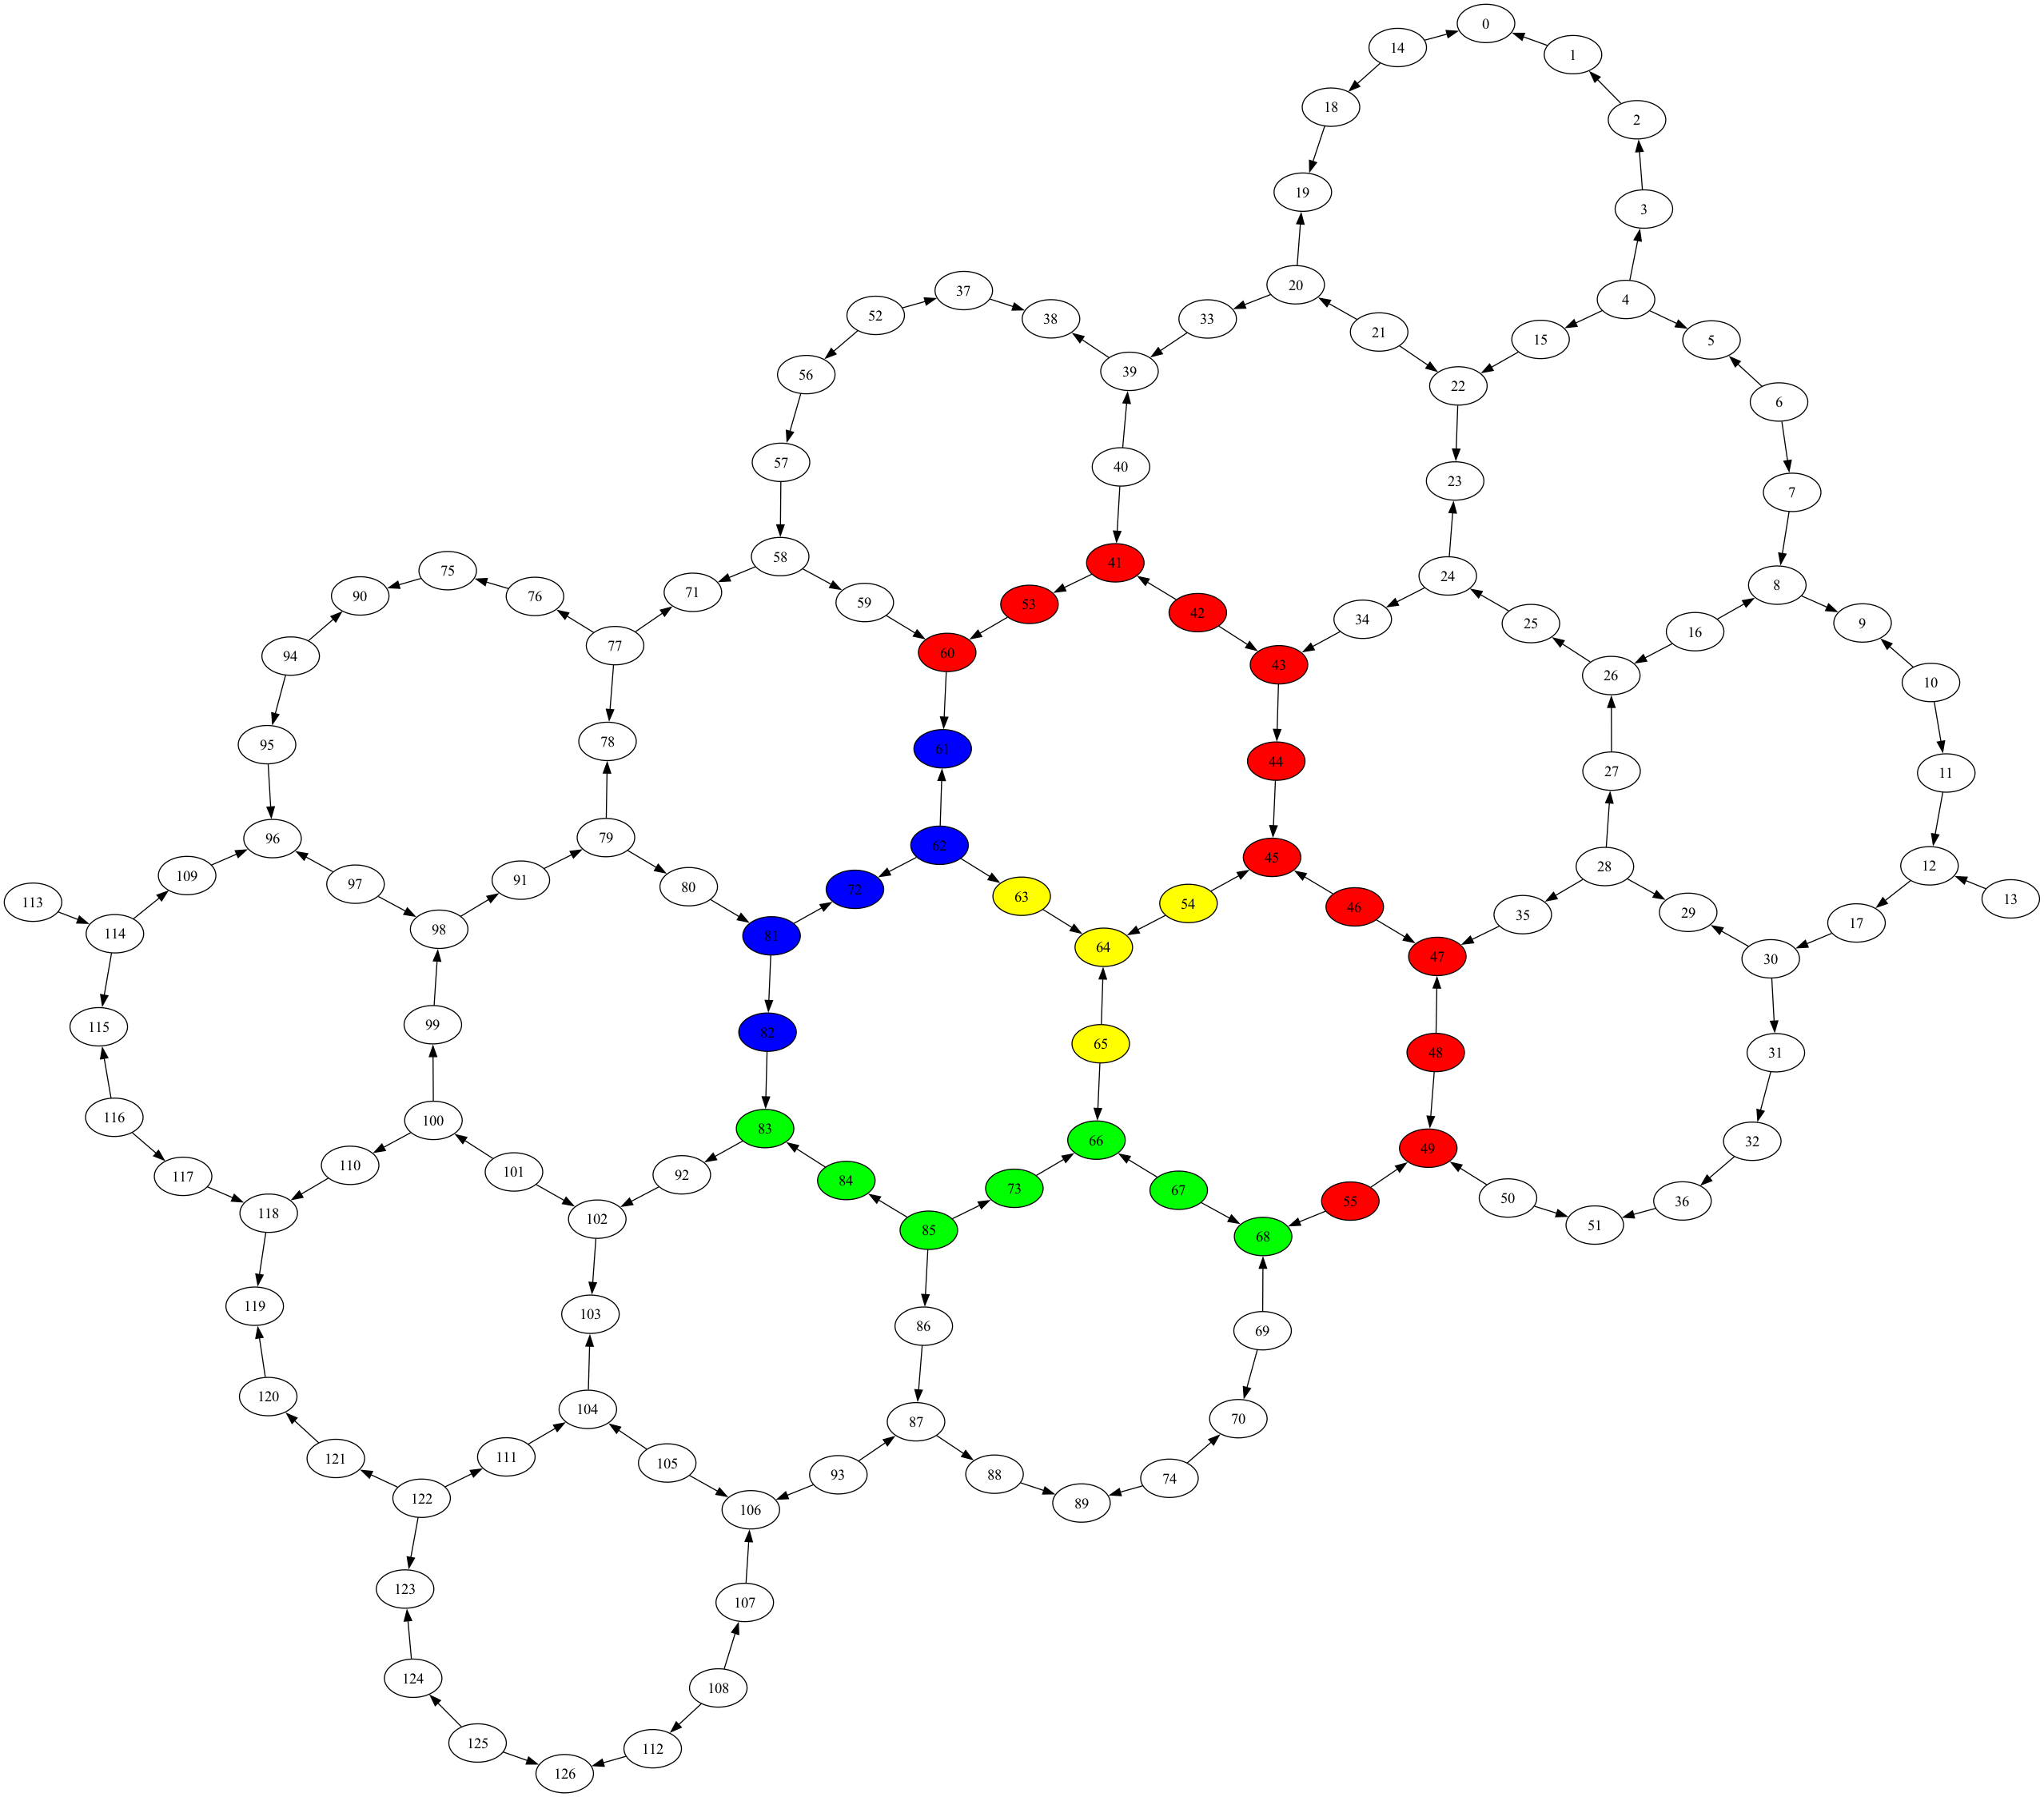

In [7]:
from rustworkx.visualization import graphviz_draw

colors = ['blue', 'red', 'yellow', 'green', 'white']
def node_attr(node):
    for i in range(num_nodes):
        for j in embedding[i]:
            if node == backend.coupling_map.graph.nodes()[j]:
                return {'fillcolor': colors[i], 'style': 'filled'}      
    return {'fillcolor': colors[-1], 'style': 'filled'}

graphviz_draw(backend.coupling_map.graph, node_attr_fn=node_attr, method="neato")

If we increase the number of nodes to 5, then valid minor-embedding cannot be found (`find_embedding` function returns an empty dictionary).

embedding={}


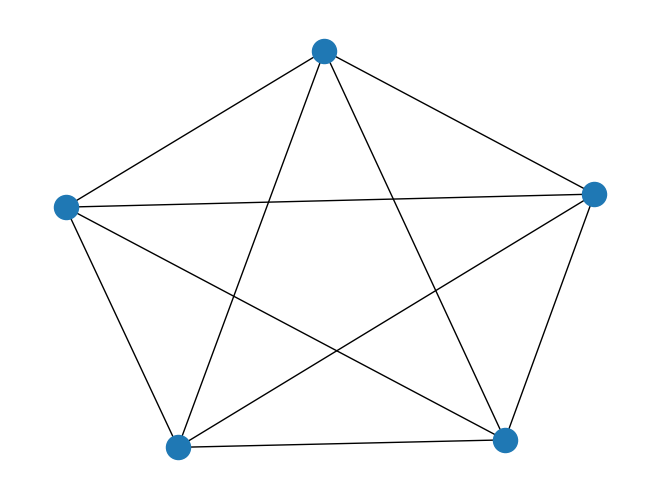

In [9]:
num_nodes = 5
source = nx.complete_graph(num_nodes)
nx.draw(source)
embedding = find_embedding(source, backend.coupling_map.graph.edge_list())
print(f'{embedding=}')